### Problem in brief
#### Use case:
Is there a relationship between humidity and temperature?
What about between humidity and apparent temperature?
Can you predict the apparent temperature given the humidity?

#### Visualize and understand the dataset

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1bFdejZAAiTHrlM8ecsP8vNIJfKXxSzcJ',dest_path='./data/weatherHistory.csv',unzip=True)

In [ ]:
# load the dataset
import pandas as pd
weather_df = pd.read_csv('data/weatherHistory.csv')
weather_df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print("No of rows : "+str(weather_df.shape[0]))
print(weather_df.dtypes)

No of rows : 96453
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


### Preprocess the dataset as specified in the data mining process

In [ ]:
print(weather_df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
# drop all rows with atleast one NaN
new_df = weather_df.dropna(axis = 0, how ='any')

In [ ]:
# check null value count
print(new_df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
print("Number of duplicates : " + str(new_df.duplicated().sum()))

# dropping duplicate values
new_df = new_df.drop_duplicates()

print(new_df.duplicated().sum())

new_df = new_df.reset_index(drop=True)

Number of duplicates : 24
0


In [ ]:
print(new_df["Loud Cover"].describe())
new_df.drop('Loud Cover', axis=1, inplace=True)

print(new_df["Formatted Date"].describe())
new_df.drop('Formatted Date', axis=1, inplace=True)

print(new_df["Daily Summary"].describe())
new_df.drop('Daily Summary', axis=1, inplace=True)

count    95912.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Loud Cover, dtype: float64
count                             95912
unique                            95912
top       2009-01-08 17:00:00.000 +0100
freq                                  1
Name: Formatted Date, dtype: object
count                                 95912
unique                                  214
top       Mostly cloudy throughout the day.
freq                                  20020
Name: Daily Summary, dtype: object


In [ ]:
new_df.count()

Summary                     95912
Precip Type                 95912
Temperature (C)             95912
Apparent Temperature (C)    95912
Humidity                    95912
Wind Speed (km/h)           95912
Wind Bearing (degrees)      95912
Visibility (km)             95912
Pressure (millibars)        95912
dtype: int64

### Handle Outliers

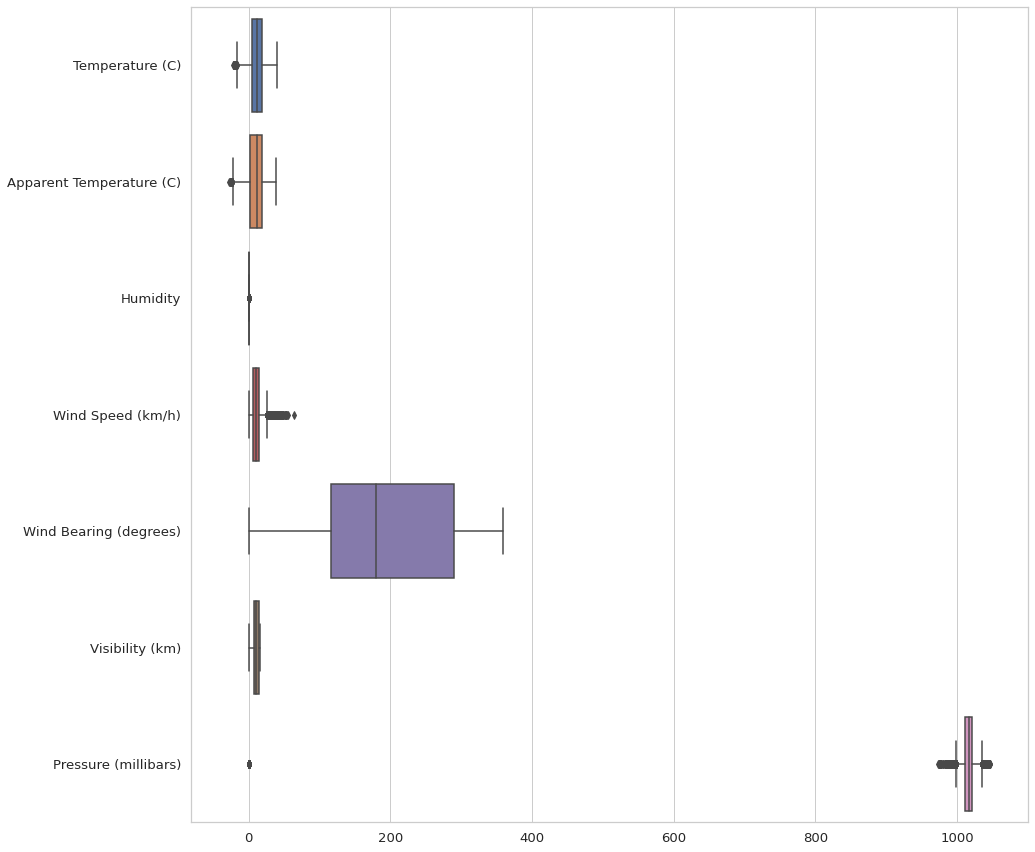

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
stats_df_without_outliers = new_df.drop(["Summary", "Precip Type"], axis=1)
sns.boxplot(data=stats_df_without_outliers, orient="h")

Before Shape: (95912, 9)
After Shape: (95890, 9)


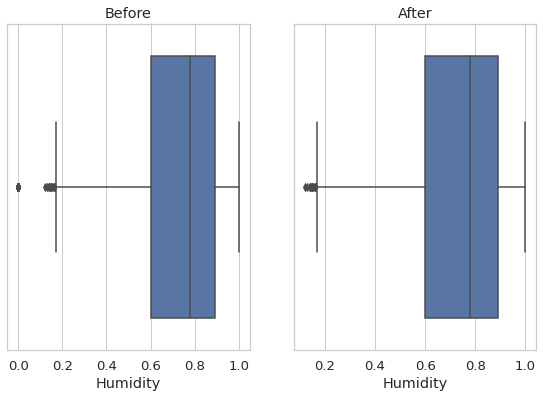

In [ ]:
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1.2, style='whitegrid')
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

## DataFrame
print("Before Shape:",new_df.shape)

## Removing 0 from column values
df_humid = new_df.loc[~(new_df['Humidity'] == 0)]
## Visulization
print("After Shape:",df_humid.shape)

sns.boxplot(new_df["Humidity"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_humid["Humidity"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Before Shape: (95890, 9)
After Shape: (95889, 9)


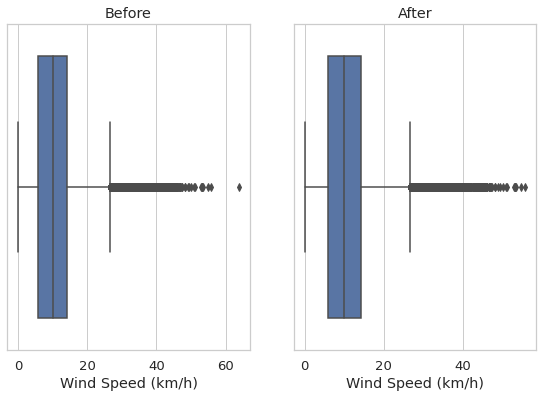

In [ ]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

## DataFrame
print("Before Shape:",df_humid.shape)
## Removing 0 from column values
df_wind_speed = df_humid.loc[(df_humid['Wind Speed (km/h)'] < 60)]
## Visulization
print("After Shape:",df_wind_speed.shape)

sns.boxplot(df_humid["Wind Speed (km/h)"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_wind_speed["Wind Speed (km/h)"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Before Shape: (95889, 9)
After Shape: (94601, 9)


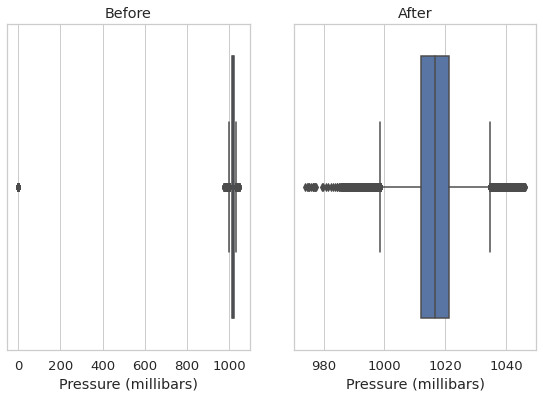

In [ ]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

## DataFrame
print("Before Shape:",df_wind_speed.shape)

## Removing 0 from column values
df_pressure = df_wind_speed.loc[~(df_wind_speed['Pressure (millibars)'] == 0)]
## Visulization
print("After Shape:",df_pressure.shape)

sns.boxplot(df_wind_speed["Pressure (millibars)"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_pressure["Pressure (millibars)"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
df2 = df_pressure

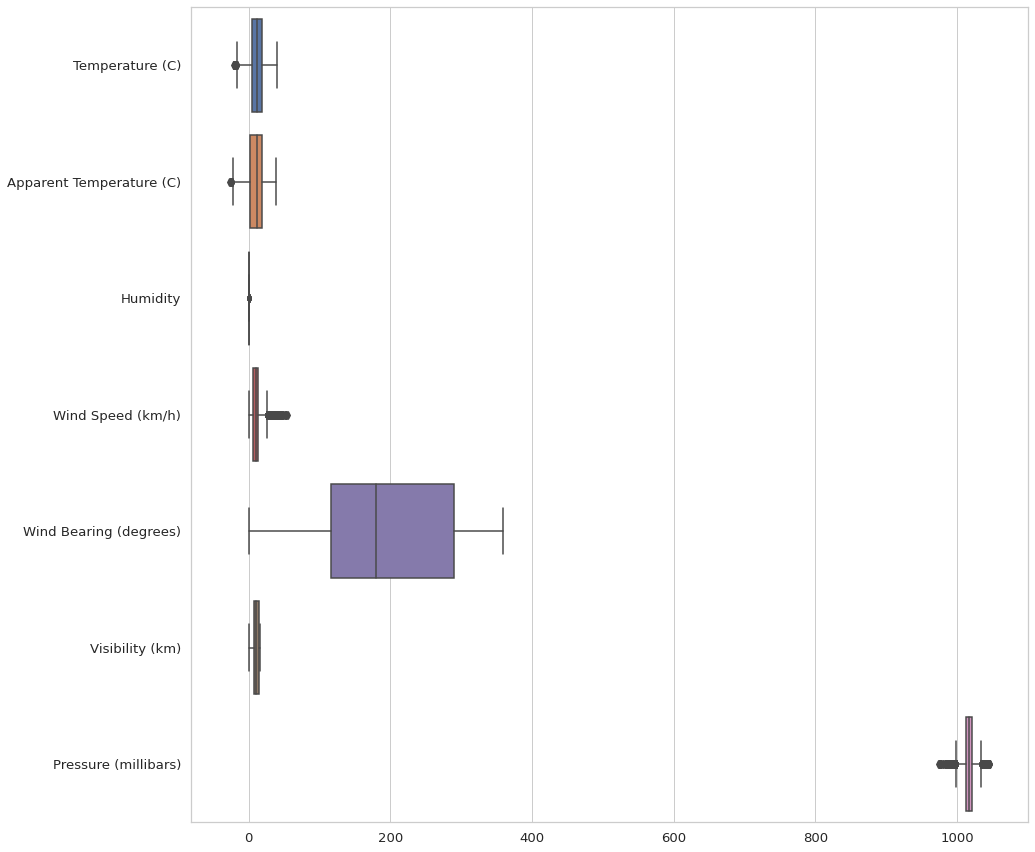

In [ ]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
stats_df_without_outliers = df2.drop(["Summary", "Precip Type"], axis=1)
sns.boxplot(data=stats_df_without_outliers, orient="h")

### Q-Q plots and histograms

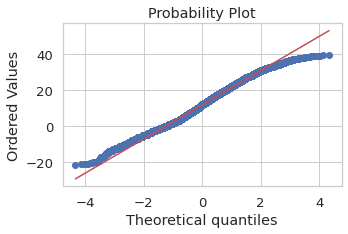

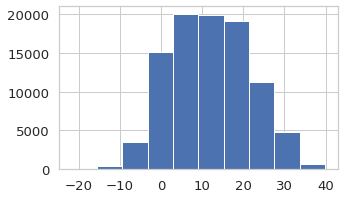

In [ ]:
# import the libraries
import scipy.stats as stats

sns.set(rc={'figure.figsize':(5,3)}, font_scale=1.2, style='whitegrid')
stats.probplot(df2["Temperature (C)"], dist="norm", plot=plt)
plt.show()
df2["Temperature (C)"].hist()

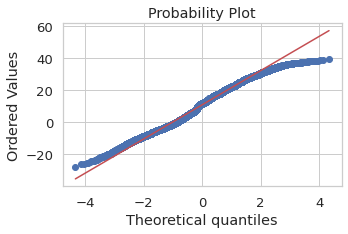

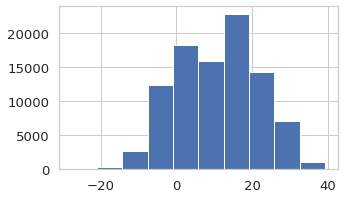

In [ ]:
stats.probplot(df2["Apparent Temperature (C)"], dist="norm", plot=plt)
plt.show()
df2["Apparent Temperature (C)"].hist()

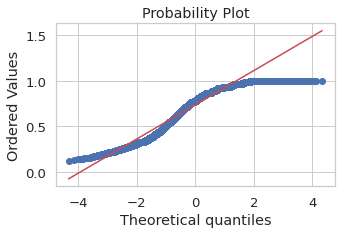

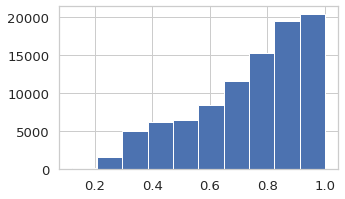

In [ ]:
stats.probplot(df2["Humidity"], dist="norm", plot=plt)
plt.show()
df2["Humidity"].hist()

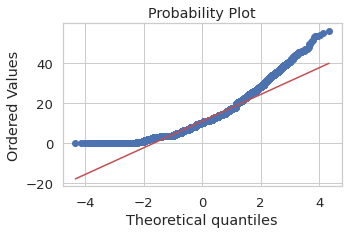

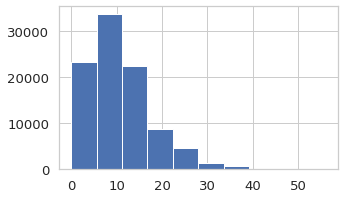

In [ ]:
stats.probplot(df2["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()
df2["Wind Speed (km/h)"].hist()

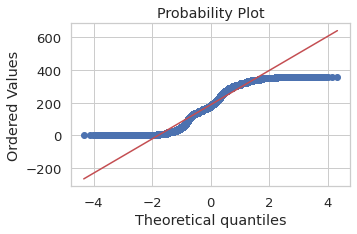

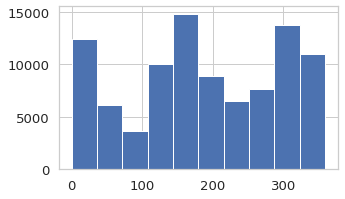

In [ ]:
stats.probplot(df2["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()
df2["Wind Bearing (degrees)"].hist()

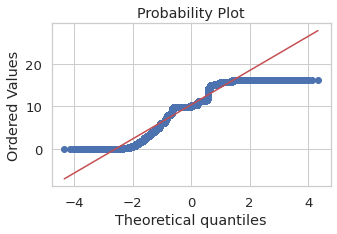

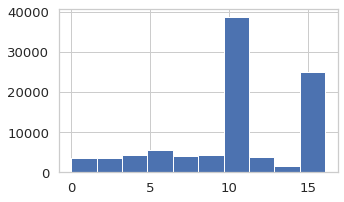

In [ ]:
stats.probplot(df2["Visibility (km)"], dist="norm", plot=plt)
plt.show()
df2["Visibility (km)"].hist()

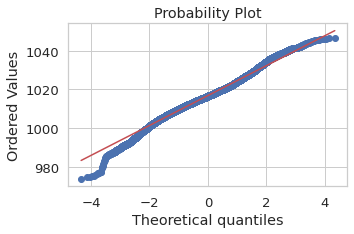

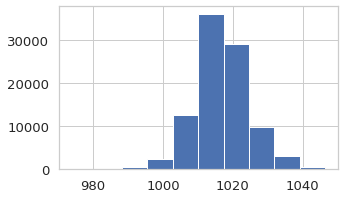

In [ ]:
stats.probplot(df2["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()
df2["Pressure (millibars)"].hist()

### Train-Test Split

In [ ]:
df_features= df2.drop('Apparent Temperature (C)', axis=1)
df_target = pd.DataFrame(df2['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 101)

x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

### Data Transformation - Handle Skewness

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61d63ad290>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61d711a1d0>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61d3ebc5d0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61d3f4d750>]]


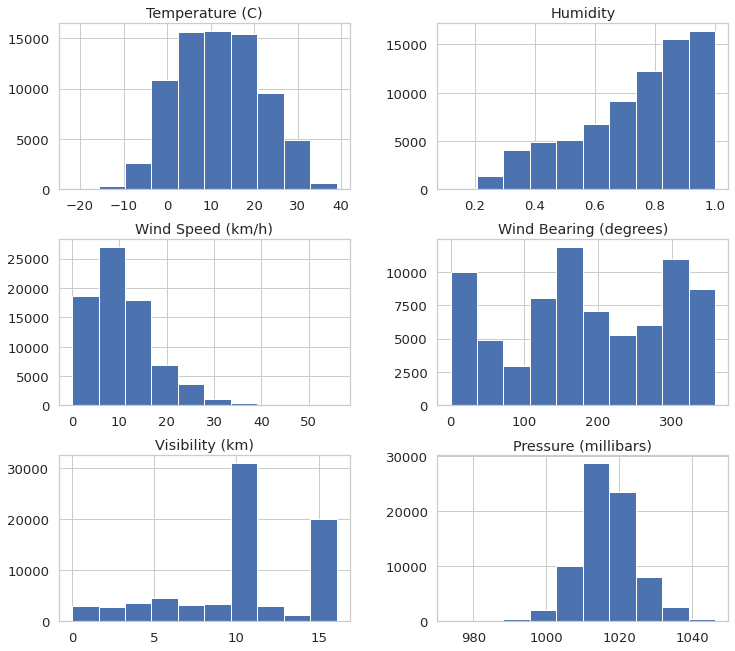

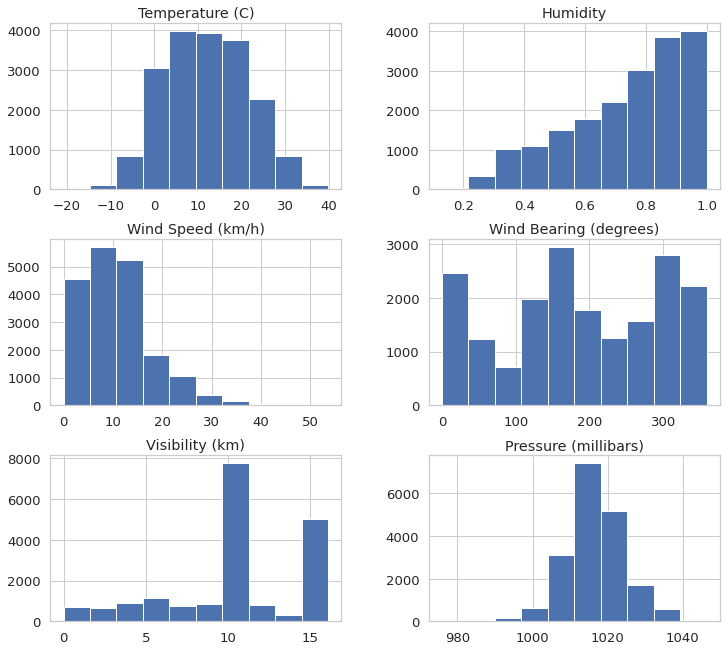

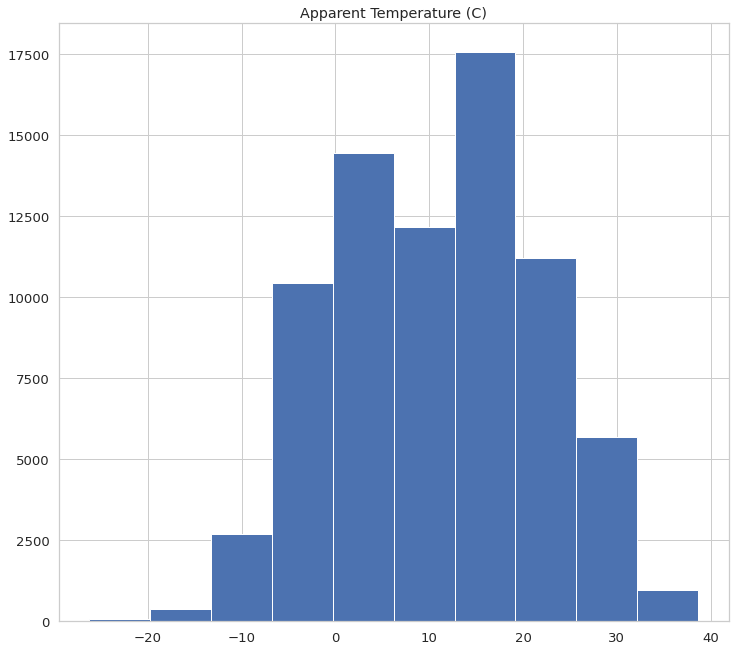

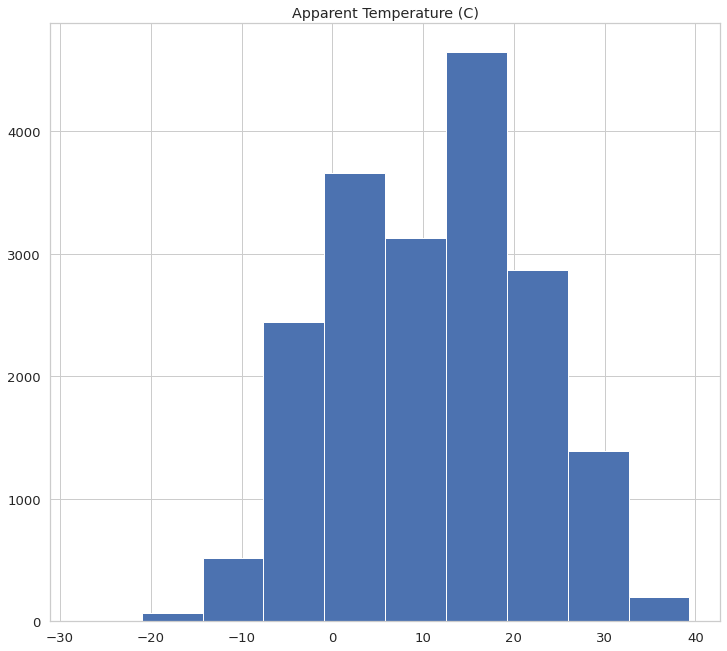

In [ ]:
sns.set(rc={'figure.figsize':(12,11)}, font_scale=1.2, style='whitegrid')
print(x_train.hist())
print(x_test.hist())
print(y_train.hist())
print(y_test.hist())

In [ ]:
# import the needed packages.
import numpy as np
from sklearn.preprocessing import FunctionTransformer

#left skewed data
# create columns variables to hold the columns that need transformation
columns = ['Humidity']

# create the function transformer object with logarithm transformation
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)

# apply the transformation to your train data
data_new = exponential_transformer.transform(x_train[columns])
df_left_skewed = pd.DataFrame(data_new, columns=columns)
df_left_skewed = df_left_skewed.reset_index(drop=True)
x_train["Humidity"] = df_left_skewed["Humidity"]

# apply the transformation to your test data
data_new = exponential_transformer.transform(x_test[columns])
df_left_skewed = pd.DataFrame(data_new, columns=columns)
df_left_skewed = df_left_skewed.reset_index(drop=True)
x_test["Humidity"] = df_left_skewed["Humidity"]

In [ ]:
#right skewed data
# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
square_root_transformation = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your train data
data_new = square_root_transformation.transform(x_train[columns])
df_right_skewed = pd.DataFrame(data_new, columns=columns)
df_right_skewed = df_right_skewed.reset_index(drop=True)
x_train["Wind Speed (km/h)"] = df_right_skewed["Wind Speed (km/h)"]

# apply the transformation to your train data
data_new = square_root_transformation.transform(x_test[columns])
df_right_skewed = pd.DataFrame(data_new, columns=columns)
df_right_skewed = df_right_skewed.reset_index(drop=True)
x_test["Wind Speed (km/h)"] = df_right_skewed["Wind Speed (km/h)"]

### Feature Coding Techniques

* One-hot Encoding-Representation of categorical variables as binary vectors.
* Integer (Label) Encoding-Converting the labels into the numeric form to
transform them into a machine-readable form.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# We fitting data
onehot_encoder.fit(x_train[['Summary']])
column_names = onehot_encoder.get_feature_names(['Summary'])

# transforming testing data
onehot_encoder_train_df = pd.DataFrame(onehot_encoder.transform(x_train[['Summary']]).toarray(),columns=column_names)
onehot_encoder_test_df = pd.DataFrame(onehot_encoder.transform(x_test[['Summary']]).toarray(),columns=column_names)

x_train = x_train.join(onehot_encoder_train_df)
x_test = x_test.join(onehot_encoder_test_df)
x_train.drop('Summary', axis=1, inplace=True)
x_test.drop('Summary', axis=1, inplace=True)

In [ ]:
x_train["Precip Type"].unique()

array(['rain', 'snow'], dtype=object)

In [ ]:
# label encoding for Precip Type - Training Data
x_train['Precip Type']=x_train['Precip Type'].astype('category')
x_train['Precip Type']=x_train['Precip Type'].cat.codes

# label encoding for Precip Type - Testing Data
x_test['Precip Type']=x_test['Precip Type'].astype('category')
x_test['Precip Type']=x_test['Precip Type'].cat.codes

### Standardized the features

In [ ]:
from sklearn.preprocessing import StandardScaler

feature_columns = ['Temperature (C)', 'Wind Bearing (degrees)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']
# for feature data
x_train_standardize = x_train[feature_columns].copy()
x_test_standardize = x_test[feature_columns].copy()

# Create the scaler object
scaler = StandardScaler()
# Fit the data to scaler
scaler.fit(x_train_standardize)
x_train_scaled = scaler.transform(x_train_standardize)
x_test_scaled = scaler.transform(x_test_standardize)
df_standardized_x_train = pd.DataFrame(x_train_scaled, columns = x_train_standardize.columns)
df_standardized_x_test = pd.DataFrame(x_test_scaled, columns = x_test_standardize.columns)

In [ ]:
target_columns = ['Apparent Temperature (C)']
# for target data
y_train_standardize = y_train[target_columns].copy()
y_test_standardize = y_test[target_columns].copy()

# Create the scaler object
scaler = StandardScaler()
# Fit the data to scaler
scaler.fit(y_train_standardize)
y_train_scaled = scaler.transform(y_train_standardize)
y_test_scaled = scaler.transform(y_test_standardize)
df_standardized_y_train = pd.DataFrame(y_train_scaled, columns = y_train_standardize.columns)
df_standardized_y_test = pd.DataFrame(y_test_scaled, columns = y_test_standardize.columns)

x_train[feature_columns] = df_standardized_x_train
x_test[feature_columns] = df_standardized_x_test
y_train[target_columns] = df_standardized_y_train
y_test[target_columns] = df_standardized_y_test

**Feature Discretization** - Normally we perform discretization when a variable is
having a very wide range with very little frequency of values.
But in this dataset, normally all the columns are having relatively high frequencies. So I think it's not much needed to perform a discretization.
Therefore I didn't perform the discretization for this dataset.

In [ ]:
print(x_train.describe(include="all"))

        Precip Type  ...  Summary_Windy and Partly Cloudy
count  75680.000000  ...                     75680.000000
mean       0.111879  ...                         0.000740
std        0.315220  ...                         0.027192
min        0.000000  ...                         0.000000
25%        0.000000  ...                         0.000000
50%        0.000000  ...                         0.000000
75%        0.000000  ...                         0.000000
max        1.000000  ...                         1.000000

[8 rows x 32 columns]


### Perform Feature Engineering

#### Significant Features

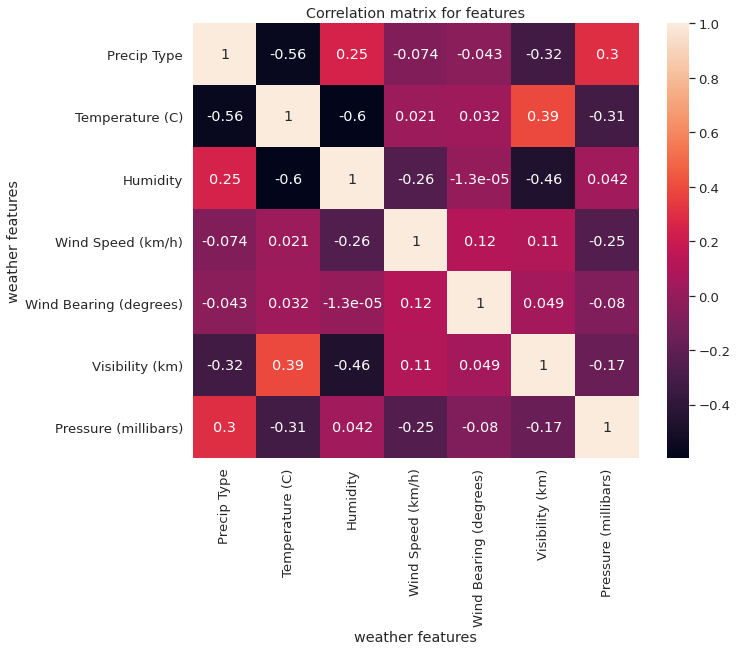

In [ ]:
# correlation matrix without target
correlation_mat = x_train.iloc[:,:7].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix for features")
plt.xlabel("weather features")
plt.ylabel("weather features")
plt.show()

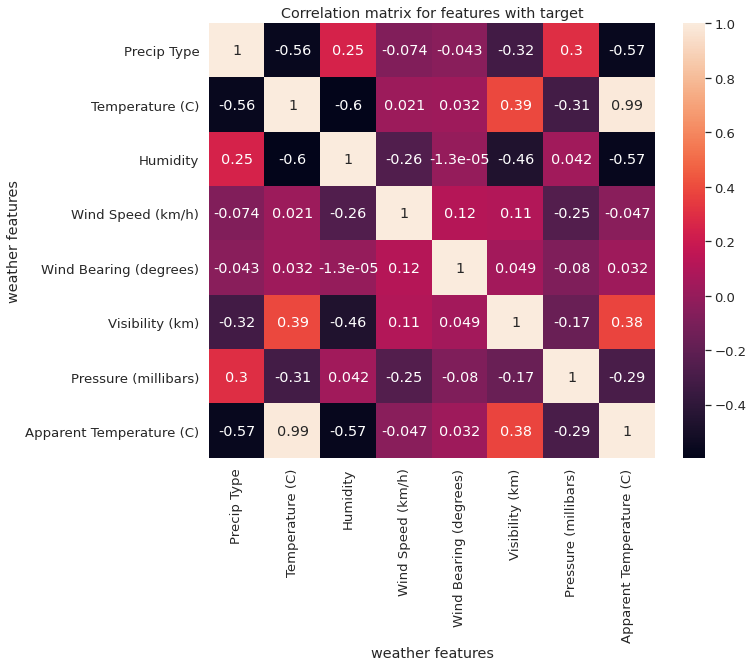

In [ ]:
# correlation matrix with target
df_all = pd.concat([x_train.iloc[:,:7], y_train], axis=1)
correlation_mat = df_all.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix for features with target")
plt.xlabel("weather features")
plt.ylabel("weather features")
plt.show()

#### PCA-Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
# check how many components should be remaind
pca.explained_variance_ratio_

array([3.22557289e-01, 1.74016842e-01, 1.36031787e-01, 1.28966209e-01,
       9.33173040e-02, 4.32550904e-02, 3.94253644e-02, 2.59945645e-02,
       1.71544846e-02, 8.83312808e-03, 7.01094207e-03, 1.08055819e-03,
       7.98351565e-04, 6.23797742e-04, 1.88938552e-04, 1.25122645e-04,
       1.04373224e-04, 8.39127551e-05, 6.95285030e-05, 6.35219414e-05,
       5.91896448e-05, 5.52891689e-05, 5.23869169e-05, 4.17950637e-05,
       2.66152635e-05, 2.37208527e-05, 1.98302862e-05, 1.00415667e-05,
       6.01032627e-06, 2.08421731e-06, 1.92702352e-06, 6.36132087e-32])

In [ ]:
pca = PCA(n_components=8)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

### Train model

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train_pca,y_train)

### Prediction

In [ ]:
predictions = lm.predict(x_test_pca)
y_hat = pd.DataFrame(predictions, columns=["Predicted Apparent Temperature (C)"])

print(y_test.head(10))
print(y_hat.head(10))

   Apparent Temperature (C)
0                 -1.173712
1                  0.177357
2                  0.021824
3                 -0.829983
4                  1.214249
5                 -0.407968
6                  1.105375
7                  0.547528
8                 -0.046093
9                  1.112634
   Predicted Apparent Temperature (C)
0                           -1.037089
1                            0.026487
2                           -0.188414
3                           -0.720152
4                            1.185912
5                           -0.418605
6                            1.054285
7                            0.591912
8                           -0.203306
9                            1.169169


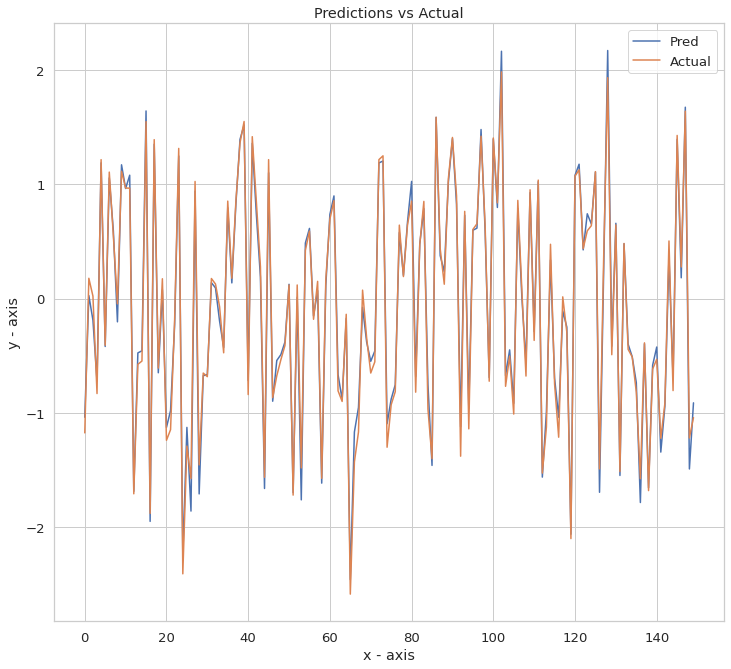

In [ ]:
plt.plot(y_hat[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predictions vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Model Evaluation

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_for_model=mean_squared_error(y_test, y_hat)
print("Mean squared error : "+str(mse_for_model))

#Root Mean Squared Error
from math import sqrt
rmsq_for_model = sqrt(mean_squared_error(y_test, y_hat))
print("Root mean squared error : "+str(rmsq_for_model))

Mean squared error : 0.011434201149236267
Root mean squared error : 0.10693082413053903


In [ ]:
#Coefficient of determination R²  of the prediction
score_pca=lm.score(x_test_pca,y_test)
print("Coefficient of determination R²  of the prediction : "+str(score_pca * 100)+"%")

Coefficient of determination R²  of the prediction : 98.8376720207106%


In [ ]:
#Evaluating the Weight factors of the model
print(lm.coef_)


[[-0.52019517 -0.23630519  0.01414671 -0.36158396  0.43422157  0.03087089
  -0.56430034  0.05990415]]


In [ ]:
# Necessary imports:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
x = pd.DataFrame(x_train_pca).append(pd.DataFrame(x_test_pca)).reset_index(drop=True)
y = y_train.append(y_test).reset_index(drop=True)
scores = cross_val_score(model, x, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.98835945 0.98866299 0.98799851 0.9885009  0.98880557 0.98834705]


In [ ]:
predictions = cross_val_predict(model, x, y, cv=6)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9884475299502475
